In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wandb torch torchvision pandas numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [3]:
!pip install kaggle

In [4]:
#kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ninijgushia","key":"cc563209fa39539b72b10092e325a30a"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config view

Configuration values from /root/.kaggle
- username: ninijgushia
- path: None
- proxy: None
- competition: None


In [6]:
!kaggle datasets download -d msambare/fer2013
!unzip fer2013.zip
!ls -la

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating: train/sad/Training_65526454.jpg  
  inflating: train/sad/Training_65531175.jpg  
  inflating: train/sad/Training_65552921.jpg  
  inflating: train/sad/Training_65552938.jpg  
  inflating: train/sad/Training_65563105.jpg  
  inflating: train/sad/Training_6558295.jpg  
  inflating: train/sad/Training_65586139.jpg  
  inflating: train/sad/Training_65591252.jpg  
  inflating: train/sad/Training_65626778.jpg  
  inflating: train/sad/Training_65701260.jpg  
  inflating

In [7]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: njgus21 (njgus21-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import wandb
import os

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [10]:
print(os.listdir('.'))


['.config', 'test', 'train', 'kaggle.json', 'fer2013.zip', 'drive', 'sample_data']


In [11]:
emotion_labels = {
    'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3,
    'sad': 4, 'surprise': 5, 'neutral': 6
}

emotion_names = {
    0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy',
    4: 'Sad', 5: 'Surprise', 6: 'Neutral'
}

In [12]:
# Dataset inspection


 train and test folders

Train folder:
  neutral: 4965 images
  angry: 3995 images
  disgust: 436 images
  surprise: 3171 images
  happy: 7215 images
  fear: 4097 images
  sad: 4830 images

Test folder contents:
  neutral: 1233 images
  angry: 958 images
  disgust: 111 images
  surprise: 831 images
  happy: 1774 images
  fear: 1024 images
  sad: 1247 images

total training images: 28709
total test images: 7178
total dataset size: 35887


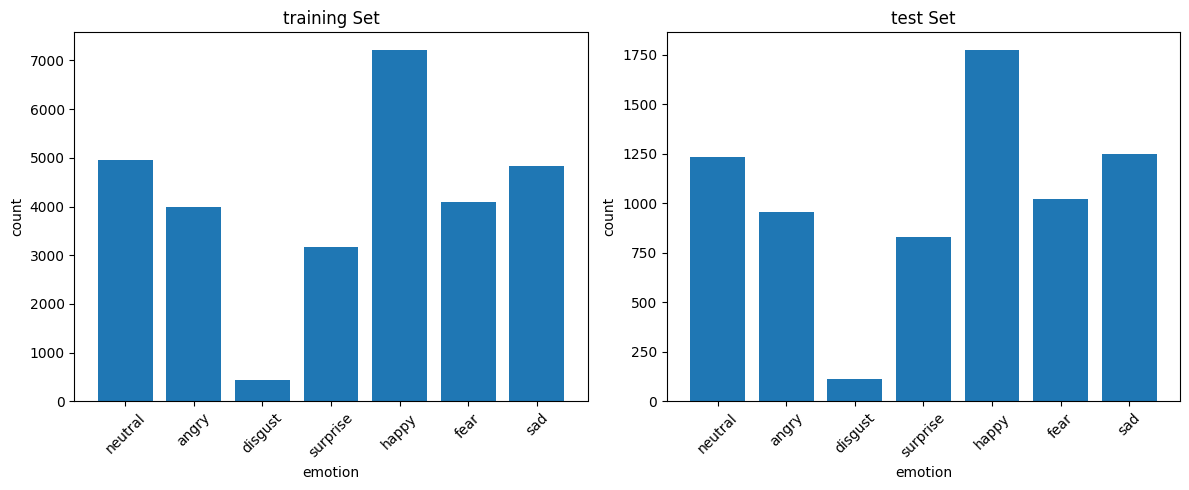


 class balance analysis:
imbalanced data


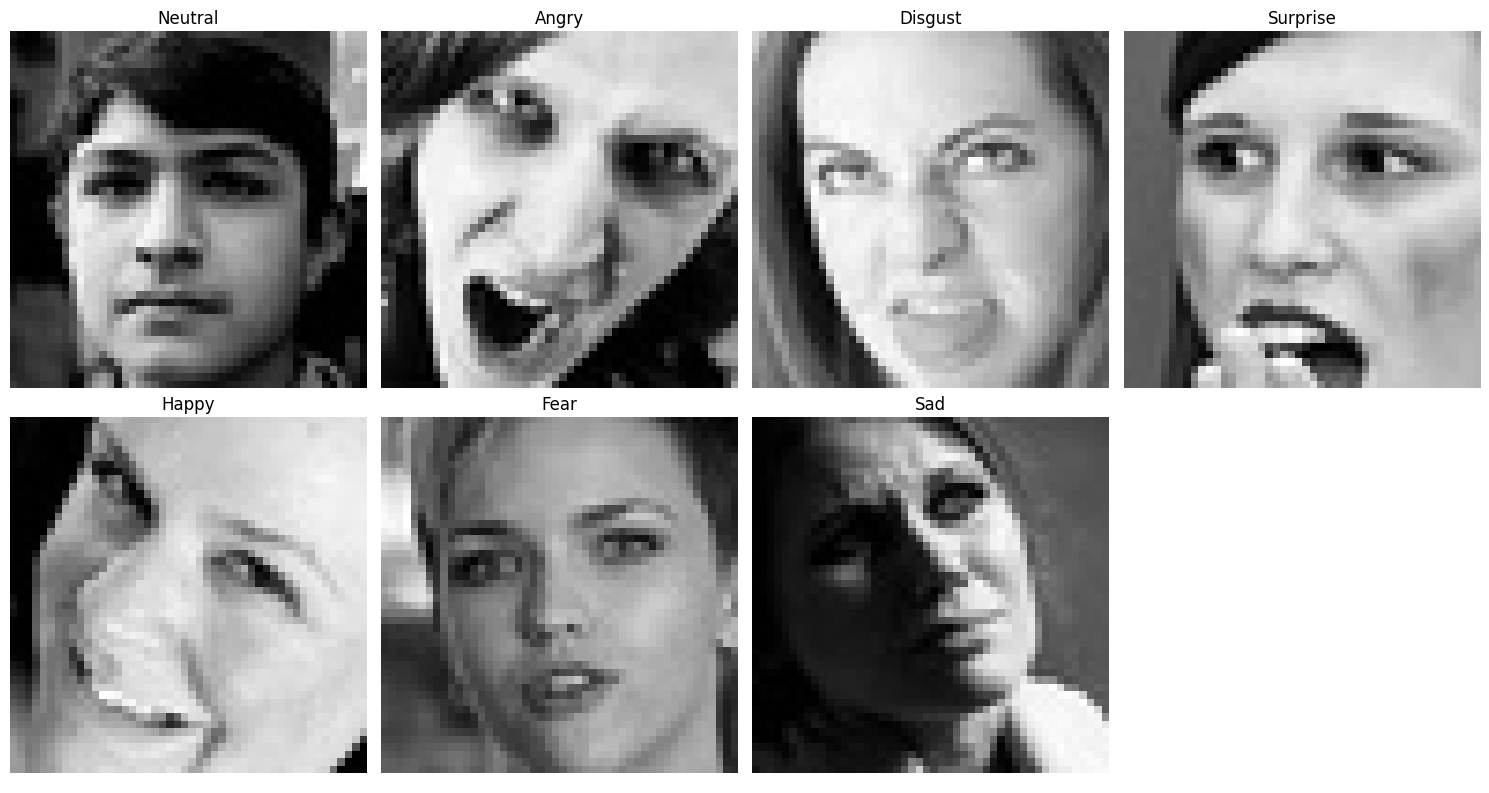

In [13]:
if os.path.exists('train') and os.path.exists('test'):
    print("\n train and test folders")
    print("\nTrain folder:")
    training_emotions = os.listdir('train')
    training_counts = {}

    for emotion in training_emotions:
        emotion_path = os.path.join('train', emotion)
        if os.path.isdir(emotion_path):
            count = len(os.listdir(emotion_path))
            training_counts[emotion] = count
            print(f"  {emotion}: {count} images")

    print("\nTest folder contents:")
    testing_emotions = os.listdir('test')
    testing_counts = {}

    for emotion in testing_emotions:
        emotion_path = os.path.join('test', emotion)
        if os.path.isdir(emotion_path):
            count = len(os.listdir(emotion_path))
            testing_counts[emotion] = count
            print(f"  {emotion}: {count} images")

    total_training = sum(training_counts.values())
    total_testing = sum(testing_counts.values())
    print(f"\ntotal training images: {total_training}")
    print(f"total test images: {total_testing}")
    print(f"total dataset size: {total_training + total_testing}")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.bar(training_counts.keys(), training_counts.values())
    plt.title('training Set')
    plt.xlabel('emotion')
    plt.ylabel('count')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    plt.bar(testing_counts.keys(), testing_counts.values())
    plt.title('test Set')
    plt.xlabel('emotion')
    plt.ylabel('count')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes = axes.ravel()

    print("\n class balance analysis:")
    train_values = list(training_counts.values())
    max_count = max(train_values)
    min_count = min(train_values)
    imbalance_ratio = max_count / min_count


    if imbalance_ratio > 2.0:
        print("imbalanced data")
        apply_balancing = True
    else:
        print("balanced data")
        apply_balancing = False

    for i, emotion in enumerate(training_emotions[:7]):  # first seven emotions
        emotion_path = os.path.join('train', emotion)
        if os.path.isdir(emotion_path):
            image_files = [f for f in os.listdir(emotion_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            if image_files:
                img_path = os.path.join(emotion_path, image_files[0])
                img = Image.open(img_path).convert('L')

                axes[i].imshow(img, cmap='gray')
                axes[i].set_title(f'{emotion.capitalize()}')
                axes[i].axis('off')

    for j in range(len(training_emotions), 8):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


    dataset_ready = True

else:
    print("error")
    print(os.listdir('.'))
    dataset_ready = False

In [14]:
from torch.utils.data import WeightedRandomSampler
from collections import Counter
import random

In [15]:
# data processing

In [16]:
class FERDataset(Dataset):
    def __init__(self, root_dir, emotion_labels, transform=None, balance_data=False, max_samples_per_class=None):
        self.root_dir = root_dir
        self.emotion_labels = emotion_labels
        self.transform = transform
        self.images = []
        self.labels = []

        emotion_samples = {emotion: [] for emotion in emotion_labels.keys()}

        for emotion_name in os.listdir(root_dir):
            emotion_path = os.path.join(root_dir, emotion_name)
            if os.path.isdir(emotion_path) and emotion_name in emotion_labels:
                label = emotion_labels[emotion_name]
                for img_file in os.listdir(emotion_path):
                    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        img_path = os.path.join(emotion_path, img_file)
                        emotion_samples[emotion_name].append((img_path, label))

        if balance_data and max_samples_per_class:
            for emotion, samples in emotion_samples.items():
                if len(samples) > max_samples_per_class:
                    samples = random.sample(samples, max_samples_per_class)
                elif len(samples) < max_samples_per_class:
                    multiplier = max_samples_per_class // len(samples)
                    remainder = max_samples_per_class % len(samples)
                    samples = samples * multiplier + samples[:remainder]

                emotion_samples[emotion] = samples

        for emotion, samples in emotion_samples.items():
            for img_path, label in samples:
                self.images.append(img_path)
                self.labels.append(label)

        class_counts = Counter(self.labels)
        print("Class distribution:")
        for emotion, label in emotion_labels.items():
            count = class_counts[label]
            print(f"  {emotion}: {count} samples")

    def get_class_weights(self):
        class_counts = Counter(self.labels)
        total_samples = len(self.labels)
        num_classes = len(class_counts)

        class_weights = {}
        for class_idx, count in class_counts.items():
            class_weights[class_idx] = total_samples / (num_classes * count)

        return torch.FloatTensor([class_weights[i] for i in range(len(class_weights))])

    def get_sampler_weights(self):
        class_counts = Counter(self.labels)
        weights = []

        for label in self.labels:
            weights.append(1.0 / class_counts[label])

        return weights

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]

        image = Image.open(img_path).convert('L')

        if self.transform:
            image = self.transform(image)

        return image, label

transform_train = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [17]:
train_dataset = FERDataset('train', emotion_labels, transform=transform_train, balance_data=True, max_samples_per_class=1000)
test_dataset = FERDataset('test', emotion_labels, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Class distribution:
  angry: 1000 samples
  disgust: 1000 samples
  fear: 1000 samples
  happy: 1000 samples
  sad: 1000 samples
  surprise: 1000 samples
  neutral: 1000 samples
Class distribution:
  angry: 958 samples
  disgust: 111 samples
  fear: 1024 samples
  happy: 1774 samples
  sad: 1247 samples
  surprise: 831 samples
  neutral: 1233 samples


In [18]:
class SimpleCNN(nn.Module):     #simple neural netw
    def __init__(self, num_classes=7):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)

        self.fc1 = nn.Linear(32 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # 48x48 -> 24x24
        x = self.pool(torch.relu(self.conv2(x)))  # 24x24 -> 12x12

        x = x.view(-1, 32 * 12 * 12)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [19]:
class ImprovedCNN(nn.Module):    #better neural netw than simple
    def __init__(self, num_classes=7, dropout_rate=0.3):
        super(ImprovedCNN, self).__init__()

        #first vlock
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        #sec block
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)

        #third block
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(dropout_rate)
        self.global_pool = nn.AdaptiveAvgPool2d(1)

        self.fc1 = nn.Linear(128, 256)
        self.bn_fc1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn_fc2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        #first block
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)

        #sec block
        x = torch.relu(self.bn3(self.conv3(x)))
        x = torch.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = self.dropout(x)

        #third block
        x = torch.relu(self.bn5(self.conv5(x)))
        x = self.global_pool(x)

        x = x.view(x.size(0), -1)

        x = torch.relu(self.bn_fc1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn_fc2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)

        return x


In [20]:
class DeepCNN(nn.Module):   #deep conv neural netw
    def __init__(self, num_classes=7):
        super(DeepCNN, self).__init__()

        self.features = nn.Sequential(
            #first block
            nn.Conv2d(1, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),

            #sec block
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),

            #third block
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.5),
        )

        self.classifier = nn.Sequential(
            nn.Linear(256 * 6 * 6, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [21]:
import torchvision.models as models

In [22]:
class CustomResNet(nn.Module):
    def __init__(self, architecture='resnet18', num_classes=7, pretrained=True):
        super(CustomResNet, self).__init__()

        if architecture == 'resnet18':
            self.backbone = models.resnet18(pretrained=pretrained)
        elif architecture == 'resnet34':
            self.backbone = models.resnet34(pretrained=pretrained)
        elif architecture == 'resnet50':
            self.backbone = models.resnet50(pretrained=pretrained)

        self.backbone.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

        num_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_features, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)

In [23]:
def train_epoch(model, train_loader, criterion, optimizer, device, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

        if batch_idx % 50 == 0:
            wandb.log({
                "train/batch_loss": loss.item(),
                "train/batch_accuracy": 100. * correct / total,
                "epoch": epoch,
                "batch": batch_idx
            })

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total

    return epoch_loss, epoch_acc

In [24]:
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()

            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())

    test_loss /= len(test_loader)
    test_acc = 100. * correct / total

    return test_loss, test_acc, all_predictions, all_targets


In [25]:
def log_confusion_matrix(targets, predictions, class_names, title="Confusion Matrix"):
    cm = confusion_matrix(targets, predictions)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    #logging
    wandb.log({f"{title.lower().replace(' ', '_')}": wandb.Image(plt)})
    plt.close()

In [26]:
def train_model(model, model_name, train_loader, test_loader, config):
    run = wandb.init(
        project="facial-expression-recognition",
        name=f"{model_name}_{config['optimizer']}_{config['lr']}_{config['batch_size']}",
        config=config,
        reinit=True
    )

    criterion = nn.CrossEntropyLoss()

    if config['optimizer'] == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=config['lr'], weight_decay=config['weight_decay'])
    elif config['optimizer'] == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=config['lr'], momentum=0.9, weight_decay=config['weight_decay'])
    elif config['optimizer'] == 'adamw':
        optimizer = optim.AdamW(model.parameters(), lr=config['lr'], weight_decay=config['weight_decay'])

    if config['scheduler'] == 'step':
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1)
    elif config['scheduler'] == 'cosine':
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=config['epochs'])
    elif config['scheduler'] == 'plateau':
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.5)


    #count parameters
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"\n{model_name} - Total parameters: {total_params:,}, Trainable: {trainable_params:,}")

    #logging model
    wandb.log({
        "model/total_parameters": total_params,
        "model/trainable_parameters": trainable_params,
        "model/architecture": model_name
    })

    #loop for traiing
    best_acc = 0.0
    patience_counter = 0
    patience = config['patience']

    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []

    for epoch in range(config['epochs']):
        print(f"\nEpoch {epoch+1}/{config['epochs']} - {model_name}")
        print("-" * 50)

        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device, epoch)

        val_loss, val_acc, val_predictions, val_targets = evaluate_model(model, test_loader, criterion, device)

        #metrics
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        if config['scheduler'] == 'plateau':
            scheduler.step(val_loss)
        else:
            scheduler.step()

        class_names = list(emotion_names.values())
        class_metrics = {}

        report = classification_report(val_targets, val_predictions,
                                 target_names=class_names,
                                 output_dict=True,
                                 zero_division=0)

        for i, class_name in enumerate(class_names):
            class_metrics[f"val/{class_name.lower()}_precision"] = report[class_name]['precision']
            class_metrics[f"val/{class_name.lower()}_recall"] = report[class_name]['recall']
            class_metrics[f"val/{class_name.lower()}_f1"] = report[class_name]['f1-score']


        #logging metrics
        metrics = {
            "epoch": epoch,
            "train/loss": train_loss,
            "train/accuracy": train_acc,
            "val/loss": val_loss,
            "val/accuracy": val_acc,
            "learning_rate": optimizer.param_groups[0]['lr']
        }
        metrics.update(class_metrics)

        wandb.log(metrics)

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        print(f"Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")

        if val_acc > best_acc:
            best_acc = val_acc
            patience_counter = 0

            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'best_acc': best_acc,
                'config': config
            }, f'/content/drive/MyDrive/best_{model_name}_{config["lr"]}.pth')

            #logging matrix
            log_confusion_matrix(val_targets, val_predictions, class_names,
                               f"{model_name} - Best Model Confusion Matrix")

            print(f"updated best accuracy: {best_acc:.2f}%")
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered after {patience} epochs without improvement")
            break

    print(f"\nTraining completed for {model_name}")
    print(f"Best validation accuracy: {best_acc:.2f}%")

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'{model_name} - Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.plot(np.array(train_accs) - np.array(val_accs), label='Overfitting Gap')
    plt.title(f'{model_name} - Overfitting Analysis')
    plt.xlabel('Epoch')
    plt.ylabel('Train Acc - Val Acc (%)')
    plt.legend()
    plt.grid(True)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

    plt.tight_layout()
    wandb.log({f"{model_name}_training_curves": wandb.Image(plt)})
    plt.show()

    # Analyze overfitting/underfitting
    final_gap = train_accs[-1] - val_accs[-1]
    max_gap = max(np.array(train_accs) - np.array(val_accs))

    analysis = {
        "final_train_acc": train_accs[-1],
        "final_val_acc": val_accs[-1],
        "best_val_acc": best_acc,
        "final_overfitting_gap": final_gap,
        "max_overfitting_gap": max_gap,
        "total_epochs": len(train_accs)
    }

    wandb.log(analysis)

    # Determine if model is overfitting or underfitting
    if final_gap > 10:
        status = "Overfitting"
    elif best_acc < 40:
        status = "Underfitting"
    else:
        status = "Good Fit"

    print(f"\nModel Analysis:")
    print(f"Status: {status}")
    print(f"Final overfitting gap: {final_gap:.2f}%")
    print(f"Maximum overfitting gap: {max_gap:.2f}%")

    wandb.log({"model_status": status})

    run.finish()

    return best_acc, analysis


In [29]:
base_config = {
        'epochs': 20,
        'patience': 4,
        'weight_decay': 1e-4
    }


experiments = [
    #simpleCNN
    {'model': 'simple_cnn', 'lr': 0.001, 'batch_size': 64, 'optimizer': 'adam', 'scheduler': 'step'},
    {'model': 'simple_cnn', 'lr': 0.001, 'batch_size': 64, 'optimizer': 'sgd', 'scheduler': 'cosine'},
    {'model': 'simple_cnn', 'lr': 0.001, 'batch_size': 32, 'optimizer': 'adam', 'scheduler': 'cosine'},

    #improvedCNN
    {'model': 'improved_cnn', 'lr': 0.001, 'batch_size': 64, 'optimizer': 'adam', 'scheduler': 'step'},
    {'model': 'improved_cnn', 'lr': 0.001, 'batch_size': 128, 'optimizer': 'adam', 'scheduler': 'plateau'},
    {'model': 'improved_cnn', 'lr': 0.0005, 'batch_size': 64, 'optimizer': 'adamw', 'scheduler': 'cosine'},

    #deepCNN
    {'model': 'deep_cnn', 'lr': 0.001, 'batch_size': 64, 'optimizer': 'adam', 'scheduler': 'step'},
    {'model': 'deep_cnn', 'lr': 0.001, 'batch_size': 128, 'optimizer': 'adamw', 'scheduler': 'plateau'},

    #resnet
    {'model': 'resnet18', 'lr': 0.0001, 'batch_size': 128, 'optimizer': 'adamw', 'scheduler': 'cosine'},
    {'model': 'resnet34', 'lr': 0.0005, 'batch_size': 64, 'optimizer': 'adam', 'scheduler': 'plateau'},
]


results = []

experiment 1/10: simple_cnn with adam
learning Rate: 0.001, batch size: 64



simple_cnn - Total parameters: 595,655, Trainable: 595,655

Epoch 1/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.9231, Train Acc: 18.87%
Val Loss: 1.8684, Val Acc: 25.31%
Learning Rate: 0.001000
updated best accuracy: 25.31%

Epoch 2/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.8506, Train Acc: 24.57%
Val Loss: 1.8094, Val Acc: 27.90%
Learning Rate: 0.001000
updated best accuracy: 27.90%

Epoch 3/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.7849, Train Acc: 29.73%
Val Loss: 1.7585, Val Acc: 30.84%
Learning Rate: 0.001000
updated best accuracy: 30.84%

Epoch 4/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.7378, Train Acc: 31.49%
Val Loss: 1.6738, Val Acc: 34.30%
Learning Rate: 0.001000
updated best accuracy: 34.30%

Epoch 5/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.6981, Train Acc: 33.54%
Val Loss: 1.6382, 

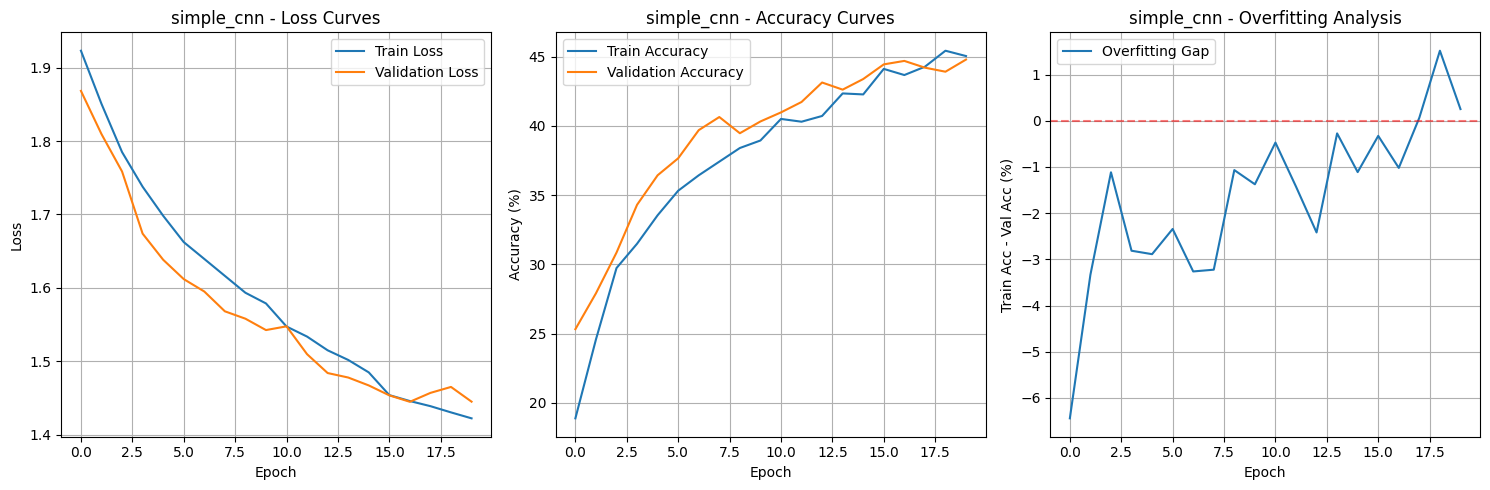


Model Analysis:
Status: Good Fit
Final overfitting gap: 0.25%
Maximum overfitting gap: 1.52%


batch,▁▅█▁▅▅█▁▅█▅▁▅█▁█▁▅█▁█▅█▁▅▅█▁▅█▅█▁▅█▅██▁█
best_val_acc,▁
epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇█████
final_overfitting_gap,▁
final_train_acc,▁
final_val_acc,▁
learning_rate,██████████████▁▁▁▁▁▁
max_overfitting_gap,▁
model/total_parameters,▁
model/trainable_parameters,▁
total_epochs,▁


experiment 2/10: simple_cnn with sgd
learning Rate: 0.001, batch size: 64



simple_cnn - Total parameters: 595,655, Trainable: 595,655

Epoch 1/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.9452, Train Acc: 14.51%
Val Loss: 1.9403, Val Acc: 17.01%
Learning Rate: 0.000994
updated best accuracy: 17.01%

Epoch 2/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.9367, Train Acc: 17.50%
Val Loss: 1.9245, Val Acc: 23.45%
Learning Rate: 0.000976
updated best accuracy: 23.45%

Epoch 3/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.9286, Train Acc: 18.77%
Val Loss: 1.9182, Val Acc: 20.63%
Learning Rate: 0.000946

Epoch 4/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.9184, Train Acc: 19.71%
Val Loss: 1.8981, Val Acc: 23.78%
Learning Rate: 0.000905
updated best accuracy: 23.78%

Epoch 5/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.9112, Train Acc: 20.26%
Val Loss: 1.8921, Val Acc: 23.64%
Learning Rate:

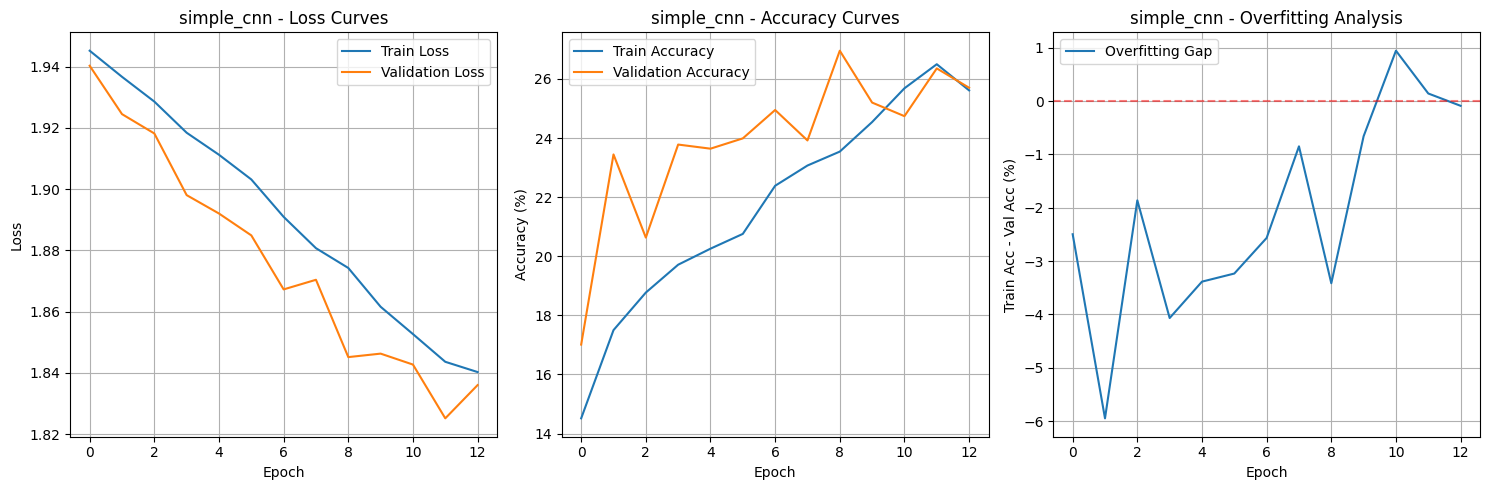


Model Analysis:
Status: Underfitting
Final overfitting gap: -0.09%
Maximum overfitting gap: 0.94%


batch,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
best_val_acc,▁
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇███
final_overfitting_gap,▁
final_train_acc,▁
final_val_acc,▁
learning_rate,███▇▇▆▅▅▄▃▂▂▁
max_overfitting_gap,▁
model/total_parameters,▁
model/trainable_parameters,▁
total_epochs,▁


experiment 3/10: simple_cnn with adam
learning Rate: 0.001, batch size: 32



simple_cnn - Total parameters: 595,655, Trainable: 595,655

Epoch 1/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.9231, Train Acc: 18.21%
Val Loss: 1.8835, Val Acc: 20.98%
Learning Rate: 0.000994
updated best accuracy: 20.98%

Epoch 2/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.8420, Train Acc: 24.59%
Val Loss: 1.7982, Val Acc: 32.01%
Learning Rate: 0.000976
updated best accuracy: 32.01%

Epoch 3/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.7973, Train Acc: 28.49%
Val Loss: 1.7201, Val Acc: 34.88%
Learning Rate: 0.000946
updated best accuracy: 34.88%

Epoch 4/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.7497, Train Acc: 30.93%
Val Loss: 1.7008, Val Acc: 33.55%
Learning Rate: 0.000905

Epoch 5/20 - simple_cnn
--------------------------------------------------
Train Loss: 1.7142, Train Acc: 33.46%
Val Loss: 1.6616, Val Acc: 36.88%
Learning Rate:

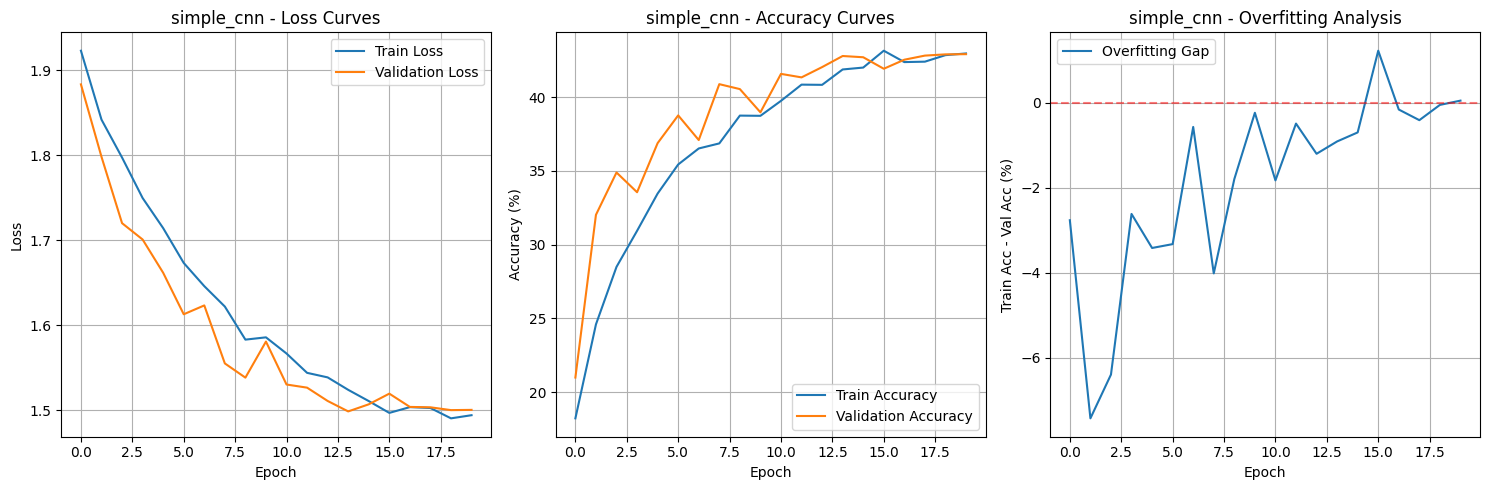


Model Analysis:
Status: Good Fit
Final overfitting gap: 0.05%
Maximum overfitting gap: 1.22%


batch,▃▅▆▃▆▃▅▆▆█▅▆█▃▅▅▆▃▅▆▁▁▃▆█▃▅▆█▁▃▅▁▃▅█▁▅▁▃
best_val_acc,▁
epoch,▁▁▁▁▁▁▂▂▃▃▃▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇████
final_overfitting_gap,▁
final_train_acc,▁
final_val_acc,▁
learning_rate,███▇▇▇▆▆▅▅▄▃▃▂▂▂▁▁▁▁
max_overfitting_gap,▁
model/total_parameters,▁
model/trainable_parameters,▁
total_epochs,▁


experiment 4/10: improved_cnn with adam
learning Rate: 0.001, batch size: 64



improved_cnn - Total parameters: 207,079, Trainable: 207,079

Epoch 1/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.9702, Train Acc: 16.71%
Val Loss: 1.9610, Val Acc: 7.34%
Learning Rate: 0.001000
updated best accuracy: 7.34%

Epoch 2/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.9300, Train Acc: 19.17%
Val Loss: 1.9236, Val Acc: 10.28%
Learning Rate: 0.001000
updated best accuracy: 10.28%

Epoch 3/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.8635, Train Acc: 22.77%
Val Loss: 2.3541, Val Acc: 15.90%
Learning Rate: 0.001000
updated best accuracy: 15.90%

Epoch 4/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.8063, Train Acc: 26.94%
Val Loss: 1.7996, Val Acc: 24.19%
Learning Rate: 0.001000
updated best accuracy: 24.19%

Epoch 5/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.7452, Train Acc: 30.94%
Val Loss

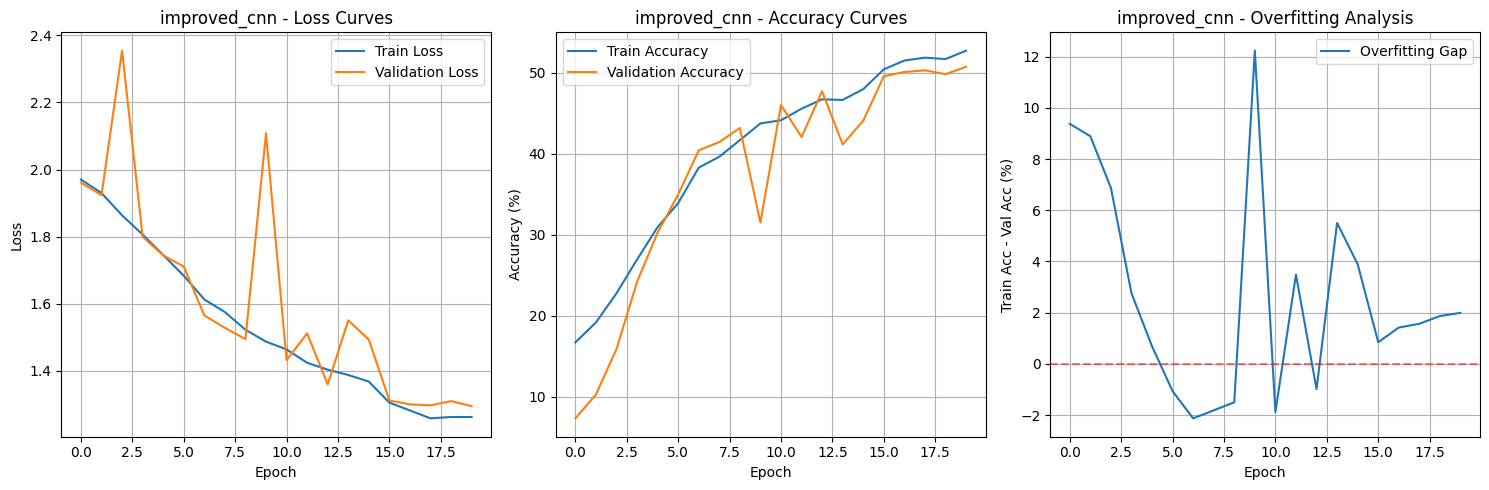


Model Analysis:
Status: Good Fit
Final overfitting gap: 1.99%
Maximum overfitting gap: 12.23%


batch,▅█▁█▁▅▁▅█▁█▁▅█▅▁█▁▅██▁▅█▅▁▅█▅██▁█▁▅▁▅█▁█
best_val_acc,▁
epoch,▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▇▇▇▇▇████
final_overfitting_gap,▁
final_train_acc,▁
final_val_acc,▁
learning_rate,██████████████▁▁▁▁▁▁
max_overfitting_gap,▁
model/total_parameters,▁
model/trainable_parameters,▁
total_epochs,▁


experiment 5/10: improved_cnn with adam
learning Rate: 0.001, batch size: 128



improved_cnn - Total parameters: 207,079, Trainable: 207,079

Epoch 1/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.9742, Train Acc: 17.37%
Val Loss: 1.9275, Val Acc: 16.62%
Learning Rate: 0.001000
updated best accuracy: 16.62%

Epoch 2/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.9359, Train Acc: 19.09%
Val Loss: 1.9608, Val Acc: 14.28%
Learning Rate: 0.001000

Epoch 3/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.8998, Train Acc: 21.59%
Val Loss: 1.8811, Val Acc: 19.81%
Learning Rate: 0.001000
updated best accuracy: 19.81%

Epoch 4/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.8650, Train Acc: 23.37%
Val Loss: 1.9340, Val Acc: 18.18%
Learning Rate: 0.001000

Epoch 5/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.8190, Train Acc: 25.16%
Val Loss: 1.9740, Val Acc: 22.89%
Learning Rate: 0.001000
updated 

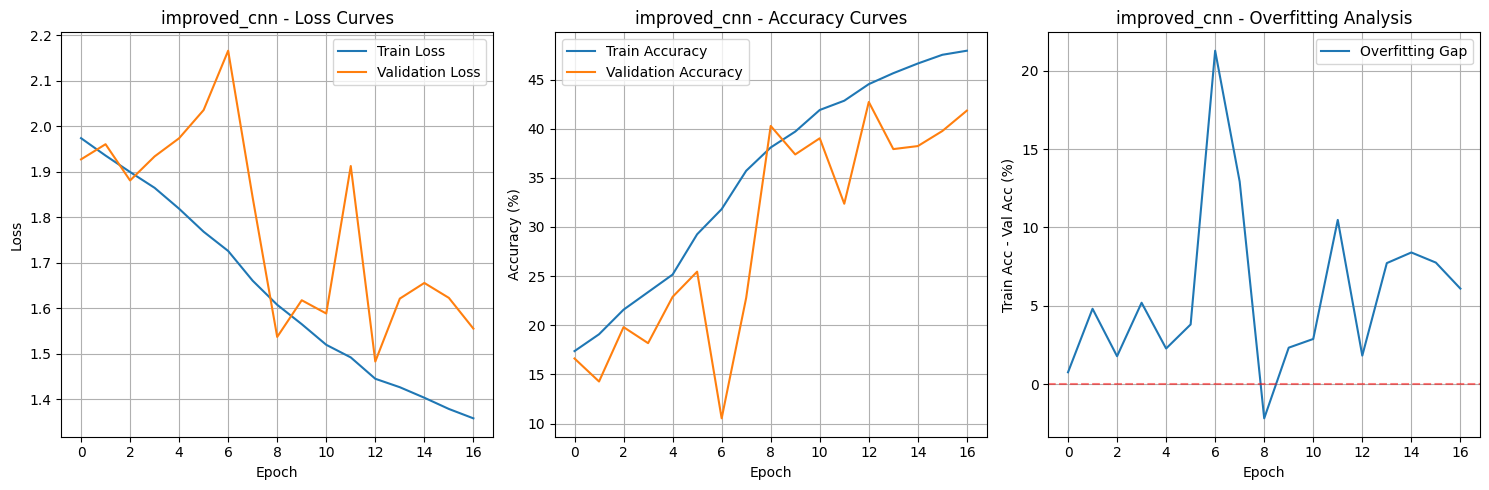


Model Analysis:
Status: Good Fit
Final overfitting gap: 6.09%
Maximum overfitting gap: 21.28%


batch,▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█
best_val_acc,▁
epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇█████
final_overfitting_gap,▁
final_train_acc,▁
final_val_acc,▁
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
max_overfitting_gap,▁
model/total_parameters,▁
model/trainable_parameters,▁
total_epochs,▁


experiment 6/10: improved_cnn with adamw
learning Rate: 0.0005, batch size: 64



improved_cnn - Total parameters: 207,079, Trainable: 207,079

Epoch 1/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.9758, Train Acc: 17.56%
Val Loss: 1.9236, Val Acc: 15.42%
Learning Rate: 0.000497
updated best accuracy: 15.42%

Epoch 2/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.9237, Train Acc: 19.67%
Val Loss: 2.1500, Val Acc: 12.06%
Learning Rate: 0.000488

Epoch 3/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.8976, Train Acc: 21.93%
Val Loss: 1.9969, Val Acc: 8.61%
Learning Rate: 0.000473

Epoch 4/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.8401, Train Acc: 24.90%
Val Loss: 1.8178, Val Acc: 24.91%
Learning Rate: 0.000452
updated best accuracy: 24.91%

Epoch 5/20 - improved_cnn
--------------------------------------------------
Train Loss: 1.7985, Train Acc: 27.34%
Val Loss: 1.7388, Val Acc: 30.19%
Learning Rate: 0.000427
updated b

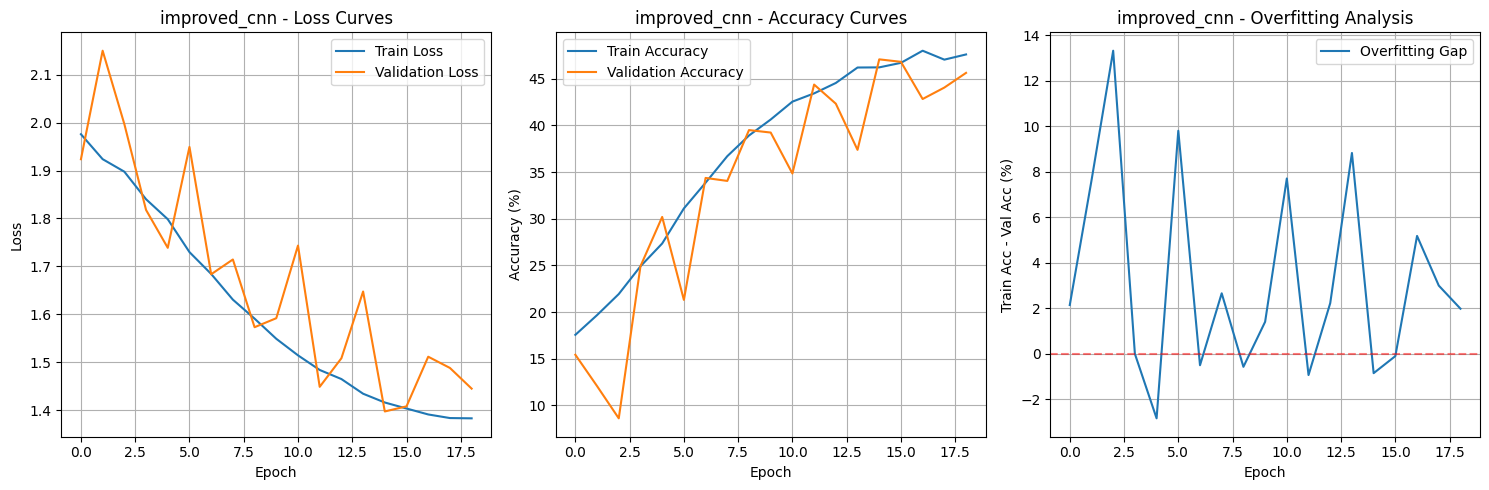


Model Analysis:
Status: Good Fit
Final overfitting gap: 1.97%
Maximum overfitting gap: 13.32%


batch,▁▅█▁▅▁█▅█▁█▅█▁▅▁▁▅█▁█▁█▁▅▁▅█▁▅▅█▁▅██▁▅██
best_val_acc,▁
epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇████
final_overfitting_gap,▁
final_train_acc,▁
final_val_acc,▁
learning_rate,███▇▇▇▆▆▅▅▄▃▃▂▂▂▁▁▁
max_overfitting_gap,▁
model/total_parameters,▁
model/trainable_parameters,▁
total_epochs,▁


experiment 7/10: deep_cnn with adam
learning Rate: 0.001, batch size: 64



deep_cnn - Total parameters: 11,706,311, Trainable: 11,706,311

Epoch 1/20 - deep_cnn
--------------------------------------------------
Train Loss: 1.9813, Train Acc: 19.16%
Val Loss: 1.8709, Val Acc: 20.97%
Learning Rate: 0.001000
updated best accuracy: 20.97%

Epoch 2/20 - deep_cnn
--------------------------------------------------
Train Loss: 1.7983, Train Acc: 29.64%
Val Loss: 1.8274, Val Acc: 29.49%
Learning Rate: 0.001000
updated best accuracy: 29.49%

Epoch 3/20 - deep_cnn
--------------------------------------------------
Train Loss: 1.6378, Train Acc: 36.51%
Val Loss: 1.7530, Val Acc: 35.85%
Learning Rate: 0.001000
updated best accuracy: 35.85%

Epoch 4/20 - deep_cnn
--------------------------------------------------
Train Loss: 1.5090, Train Acc: 41.81%
Val Loss: 1.4918, Val Acc: 42.56%
Learning Rate: 0.001000
updated best accuracy: 42.56%

Epoch 5/20 - deep_cnn
--------------------------------------------------
Train Loss: 1.4470, Train Acc: 45.29%
Val Loss: 1.4035, Val Ac

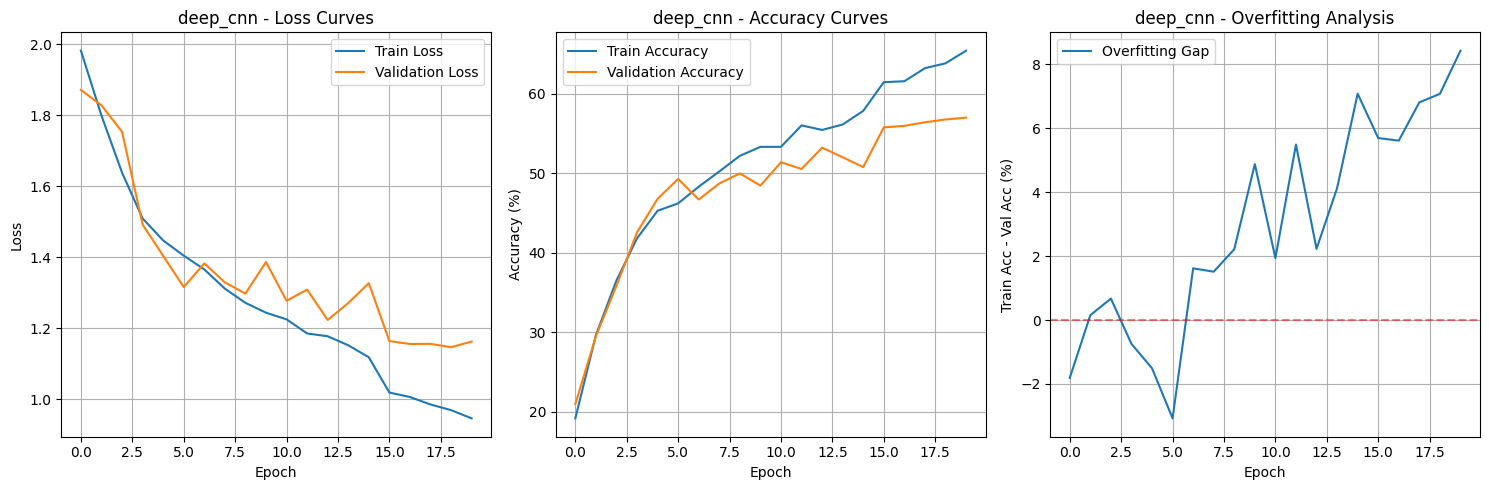


Model Analysis:
Status: Good Fit
Final overfitting gap: 8.42%
Maximum overfitting gap: 8.42%


batch,▁█▁▅█▅█▅█▁█▁█▁▅▅█▁▅█▅█▁▅█▅█▁█▁█▁▅█▅▁█▁▅▁
best_val_acc,▁
epoch,▁▁▁▁▁▂▂▂▂▂▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
final_overfitting_gap,▁
final_train_acc,▁
final_val_acc,▁
learning_rate,██████████████▁▁▁▁▁▁
max_overfitting_gap,▁
model/total_parameters,▁
model/trainable_parameters,▁
total_epochs,▁


experiment 8/10: deep_cnn with adamw
learning Rate: 0.001, batch size: 128



deep_cnn - Total parameters: 11,706,311, Trainable: 11,706,311

Epoch 1/20 - deep_cnn
--------------------------------------------------
Train Loss: 1.9995, Train Acc: 18.51%
Val Loss: 1.8295, Val Acc: 24.14%
Learning Rate: 0.001000
updated best accuracy: 24.14%

Epoch 2/20 - deep_cnn
--------------------------------------------------
Train Loss: 1.8334, Train Acc: 27.56%
Val Loss: 1.8353, Val Acc: 29.05%
Learning Rate: 0.001000
updated best accuracy: 29.05%

Epoch 3/20 - deep_cnn
--------------------------------------------------
Train Loss: 1.7215, Train Acc: 32.59%
Val Loss: 1.5619, Val Acc: 40.50%
Learning Rate: 0.001000
updated best accuracy: 40.50%

Epoch 4/20 - deep_cnn
--------------------------------------------------
Train Loss: 1.5780, Train Acc: 39.87%
Val Loss: 1.5201, Val Acc: 40.94%
Learning Rate: 0.001000
updated best accuracy: 40.94%

Epoch 5/20 - deep_cnn
--------------------------------------------------
Train Loss: 1.4688, Train Acc: 43.69%
Val Loss: 1.3952, Val Ac

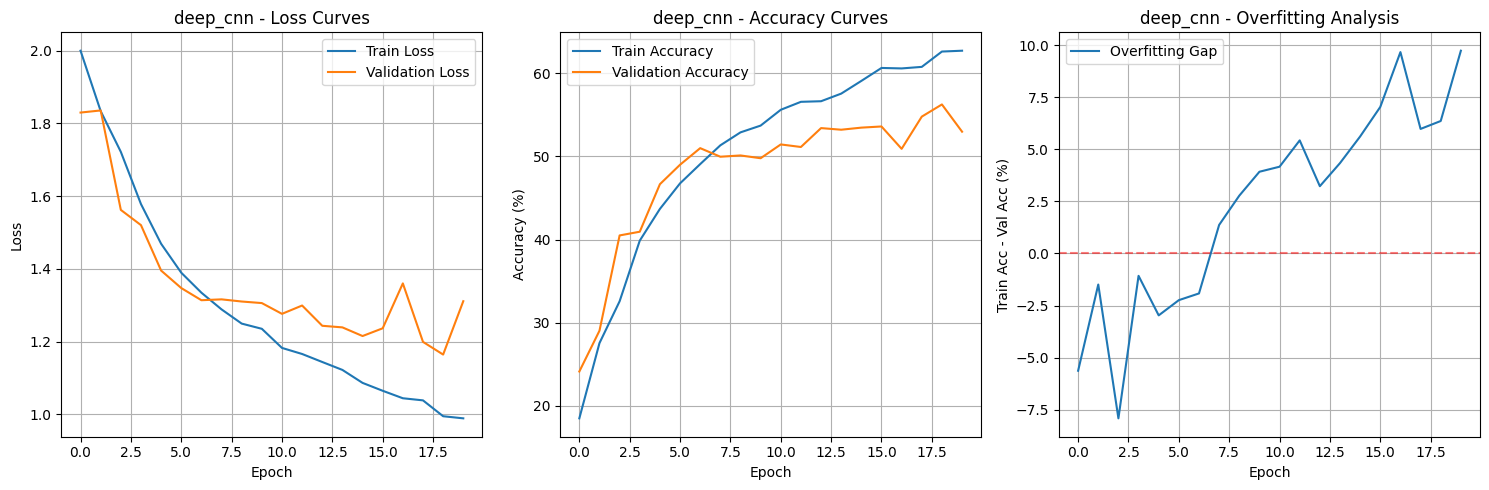


Model Analysis:
Status: Good Fit
Final overfitting gap: 9.73%
Maximum overfitting gap: 9.73%


batch,▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█
best_val_acc,▁
epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇███
final_overfitting_gap,▁
final_train_acc,▁
final_val_acc,▁
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
max_overfitting_gap,▁
model/total_parameters,▁
model/trainable_parameters,▁
total_epochs,▁


experiment 9/10: resnet18 with adamw
learning Rate: 0.0001, batch size: 128


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



resnet18 - Total parameters: 11,303,367, Trainable: 11,303,367

Epoch 1/20 - resnet18
--------------------------------------------------
Train Loss: 2.0246, Train Acc: 15.59%
Val Loss: 1.9181, Val Acc: 19.30%
Learning Rate: 0.000099
updated best accuracy: 19.30%

Epoch 2/20 - resnet18
--------------------------------------------------
Train Loss: 1.9441, Train Acc: 19.49%
Val Loss: 1.9096, Val Acc: 19.87%
Learning Rate: 0.000098
updated best accuracy: 19.87%

Epoch 3/20 - resnet18
--------------------------------------------------
Train Loss: 1.8807, Train Acc: 23.63%
Val Loss: 1.8501, Val Acc: 24.62%
Learning Rate: 0.000095
updated best accuracy: 24.62%

Epoch 4/20 - resnet18
--------------------------------------------------
Train Loss: 1.7973, Train Acc: 28.60%
Val Loss: 1.8102, Val Acc: 27.74%
Learning Rate: 0.000090
updated best accuracy: 27.74%

Epoch 5/20 - resnet18
--------------------------------------------------
Train Loss: 1.7246, Train Acc: 32.79%
Val Loss: 1.7677, Val Ac

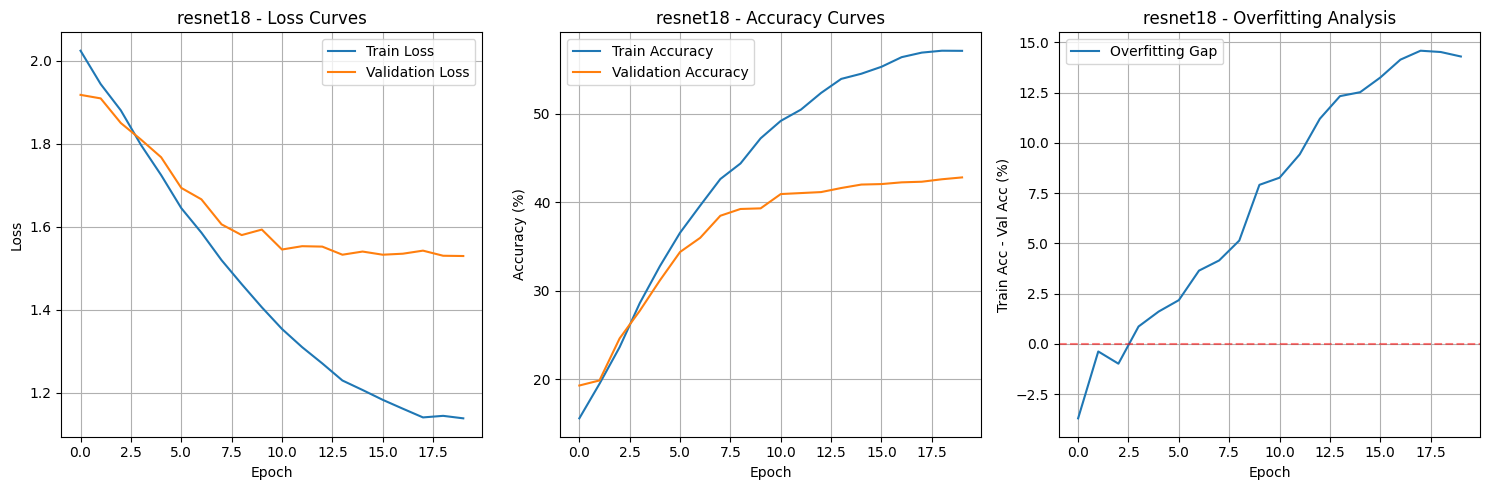


Model Analysis:
Status: Overfitting
Final overfitting gap: 14.30%
Maximum overfitting gap: 14.59%


batch,▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█▁█
best_val_acc,▁
epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇███
final_overfitting_gap,▁
final_train_acc,▁
final_val_acc,▁
learning_rate,███▇▇▇▆▆▅▅▄▃▃▂▂▂▁▁▁▁
max_overfitting_gap,▁
model/total_parameters,▁
model/trainable_parameters,▁
total_epochs,▁


experiment 10/10: resnet34 with adam
learning Rate: 0.0005, batch size: 64


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 159MB/s]



resnet34 - Total parameters: 21,411,527, Trainable: 21,411,527

Epoch 1/20 - resnet34
--------------------------------------------------
Train Loss: 1.9703, Train Acc: 17.29%
Val Loss: 2.0082, Val Acc: 18.24%
Learning Rate: 0.000500
updated best accuracy: 18.24%

Epoch 2/20 - resnet34
--------------------------------------------------
Train Loss: 1.8550, Train Acc: 25.01%
Val Loss: 1.7744, Val Acc: 27.01%
Learning Rate: 0.000500
updated best accuracy: 27.01%

Epoch 3/20 - resnet34
--------------------------------------------------
Train Loss: 1.7330, Train Acc: 33.01%
Val Loss: 1.6893, Val Acc: 36.11%
Learning Rate: 0.000500
updated best accuracy: 36.11%

Epoch 4/20 - resnet34
--------------------------------------------------
Train Loss: 1.6103, Train Acc: 38.16%
Val Loss: 1.7259, Val Acc: 34.17%
Learning Rate: 0.000500

Epoch 5/20 - resnet34
--------------------------------------------------
Train Loss: 1.5407, Train Acc: 41.33%
Val Loss: 1.5923, Val Acc: 40.08%
Learning Rate: 0.000

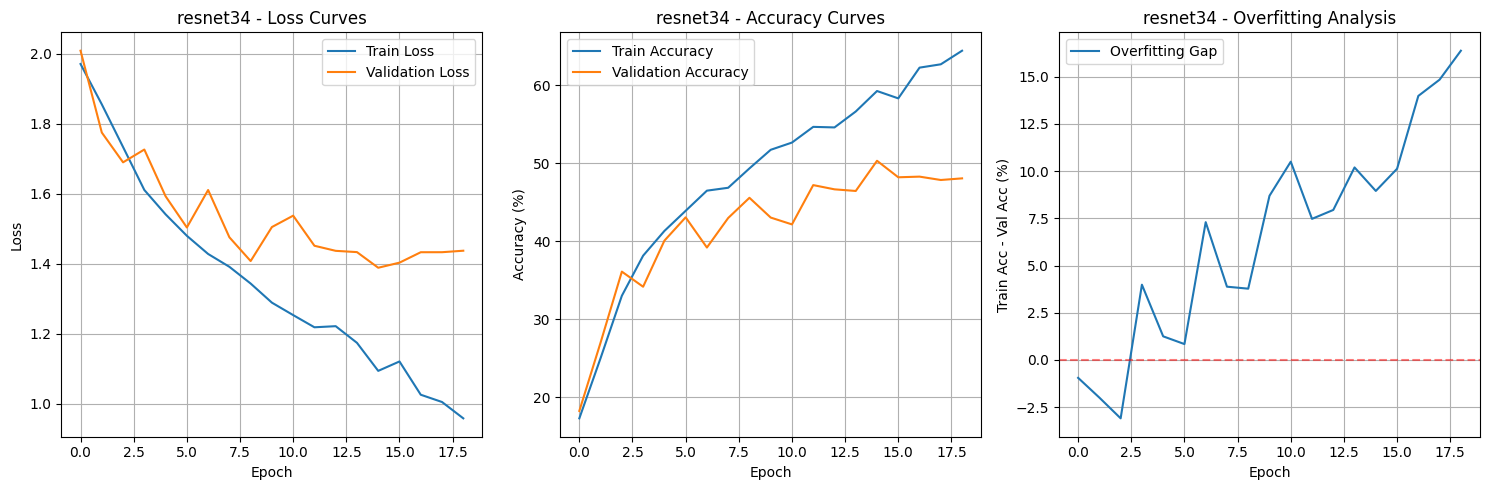


Model Analysis:
Status: Overfitting
Final overfitting gap: 16.38%
Maximum overfitting gap: 16.38%


batch,▁▅█▁▅▁██▁▅█▁▅█▁█▁▅█▁█▁▅▁▅▁▅█▅██▁▅█▁▁▅█▁█
best_val_acc,▁
epoch,▁▁▁▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇██
final_overfitting_gap,▁
final_train_acc,▁
final_val_acc,▁
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
max_overfitting_gap,▁
model/total_parameters,▁
model/trainable_parameters,▁
total_epochs,▁


In [30]:
for i, exp_config in enumerate(experiments):
        print(f"experiment {i+1}/{len(experiments)}: {exp_config['model']} with {exp_config['optimizer']}")
        print(f"learning Rate: {exp_config['lr']}, batch size: {exp_config['batch_size']}")

        config = {**base_config, **exp_config}

        #creating model
        model_name = config['model']
        if model_name == 'simple_cnn':
            model = SimpleCNN(num_classes=7).to(device)
        elif model_name == 'improved_cnn':
            model = ImprovedCNN(num_classes=7).to(device)
        elif model_name == 'deep_cnn':
            model = DeepCNN(num_classes=7).to(device)
        elif model_name == 'resnet18':
            model = CustomResNet('resnet18', num_classes=7, pretrained=True).to(device)
        elif model_name == 'resnet34':
            model = CustomResNet('resnet34', num_classes=7, pretrained=True).to(device)

        train_loader_exp = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, num_workers=2)
        test_loader_exp = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=2)

        try:
            #training of the model
            best_acc, analysis = train_model(model, model_name, train_loader_exp, test_loader_exp, config)

            results.append({
                'experiment': i+1,
                'model': model_name,
                'config': config,
                'best_accuracy': best_acc,
                'analysis': analysis
            })

        except Exception as e:
            print(f"Error in experiment {i+1}: {e}")
            continue